# Sprint 機械学習スクラッチ ロジスティック回帰
ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

### 雛形

In [110]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return

## 【問題1】仮定関数

ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


In [ ]:
    def _logistic_hypothesis(self, X):
        y_pred = 1 / (1 + math.e ** (-1 * (X@self.coef_)))
        return y_pred

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

In [ ]:
    def _gradient_descent(self, X, error):
        self.coef_ = self.coef_ - self.lr*(1/np.shape(X)[0]*(X.T@error) + self.λ/np.shape(X)[0]*np.r_[np.array([0]), self.coef_[1:]])

## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 
h
θ
(
x
)
 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

In [ ]:
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        y_pred = self.predict_proba(X)       
        
        for i in range(len(y_pred)):
            assert y_pred[i] >= 0 and y_pred[i] <= 1, "error"
            if y_pred[i] <= 0.5:
                y_pred[i] = 0   
            else:
                y_pred[i] = 1
        
        y_pred = np.where(y_pred.astype(int)==0, np.unique(self.y)[0], np.unique(self.y)[1]) 
        return y_pred

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X_one = np.c_[np.ones(X.shape[0]), X]
        y_pred = self._logistic_hypothesis(X_one)
        return y_pred

## 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

In [ ]:
    def _get_loss(self, y_pred, y):
        loss = 1/len(y)*sum((y*-1*np.log(y_pred) - (1-y)*np.log(1-y_pred))) + self.λ/(2*len(y))*sum(self.coef_**2)
        return loss

### 問題1〜4を反映したコード

In [132]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None
        self.λ = 1

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        assert len(np.unique(y)) == 2, "error"
        self.y = y 
        # ラベル変換
        y = np.where(y==np.unique(self.y)[0], 0, 1) 
        y_val = np.where(y_val==np.unique(self.y)[0], 0, 1) 
        
        # 列の追加
        X_one = np.c_[np.ones(X.shape[0]), X] 
        X_val_one = np.c_[np.ones(X_val.shape[0]), X_val] 
        
        # 初期値の設定
        self.coef_ = np.random.RandomState(0).rand(X_one.shape[1]) 
        
        # バイアスの有無
        if self.no_bias:
            self.coef_[0] = 0
                       
        for i in range(self.iter):
            y_pred = self._logistic_hypothesis(X_one) 
            y_val_pred = self._logistic_hypothesis(X_val_one)
            
            # errorの定義
            error = y_pred - y
            val_error = y_val_pred - y_val
            
            # 損失をリストに格納
            self.loss[i] = self._get_loss(y_pred, y)
            self.val_loss[i] = self._get_loss(y_val_pred, y_val)
            
            # パラメータの更新
            self._gradient_descent(X_one, error)
        
        
        if self.verbose:
            #学習過程を出力
            print("loss\n{}\n".format(self.loss))
            print("val_loss\n{}".format(self.val_loss))

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        y_pred = self.predict_proba(X)       
        
        for i in range(len(y_pred)):
            assert y_pred[i] >= 0 and y_pred[i] <= 1, "error"
            if y_pred[i] <= 0.5:
                y_pred[i] = 0   
            else:
                y_pred[i] = 1
        
        # 再変換
        y_pred = np.where(y_pred.astype(int)==0, np.unique(self.y)[0], np.unique(self.y)[1]) 
        return y_pred

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X_one = np.c_[np.ones(X.shape[0]), X]
        y_pred = self._logistic_hypothesis(X_one)
        return y_pred
    
    def _logistic_hypothesis(self, X):
        y_pred = 1 / (1 + math.e ** (-1 * (X@self.coef_)))
        return y_pred
        
    def _gradient_descent(self, X, error):
        self.coef_ = self.coef_ - self.lr*(1/np.shape(X)[0]*(X.T@error) + self.λ/np.shape(X)[0]*np.r_[np.array([0]), self.coef_[1:]])
        
    def _get_loss(self, y_pred, y):
        loss = 1/len(y)*sum((y*-1*np.log(y_pred) - (1-y)*np.log(1-y_pred))) + self.λ/(2*len(y))*sum(self.coef_**2)
        return loss

## 【問題5】学習と推定

機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [113]:
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
# 評価指標の関数
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evalate(y_test, y_pred):
    print("accuracy =", accuracy_score(y_test, y_pred))
    print("precision =", precision_score(y_test, y_pred, average='macro'))
    print("recall =", recall_score(y_test, y_pred, average='macro'))
    print("f1 =", f1_score(y_test, y_pred, average='macro'))

In [115]:
# データセットの読み込み
iris_dataset = load_iris()
X = iris_dataset['data'][50:, 2:]
y = iris_dataset['target'][50:]
X = (X - np.mean(X)) / np.std(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [116]:
#スクラッチによる推定
scratchlog = ScratchLogisticRegression(1000, 0.01, no_bias=False, verbose=False)
scratchlog.fit(X_train, y_train, X_test, y_test)
y_pred = scratchlog.predict(X_test)
y_pred_proba = scratchlog.predict_proba(X_test)
evalate(y_test, y_pred)

accuracy = 0.9393939393939394
precision = 0.9375
recall = 0.9473684210526316
f1 = 0.9388888888888889


In [117]:
#scilit-learnによる推定
from sklearn.linear_model import LogisticRegression
sklearn_clf = LogisticRegression()
sklearn_clf.fit(X_train, y_train)
sk_y_pred = sklearn_clf.predict(X_test)
sl_y_pred_proba = sklearn_clf.predict_proba(X_test)
evalate(y_test, sk_y_pred)

accuracy = 0.9393939393939394
precision = 0.9379699248120301
recall = 0.9379699248120301
f1 = 0.9379699248120301


/Users/kojiyakubo/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。


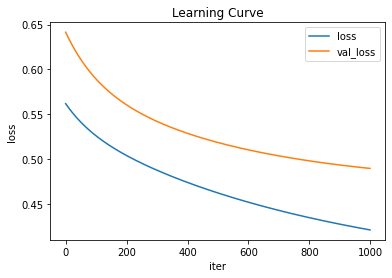

In [119]:
plt.title("Learning Curve")
plt.xlabel("iter")
plt.ylabel("loss")
plt.plot(np.arange(1000), scratchlog.loss, label="loss")
plt.plot(np.arange(1000), scratchlog.val_loss, label="val_loss")
plt.legend()
plt.show()

## 【問題7】決定領域の可視化
決定領域を可視化してください。


In [127]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [128]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel',
                    ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['white', 'pink', 'skyblue']
    # クラスの長さをクラス数
    n_class = len(set(y))

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # contourf_color、scatter_color、target_namesをクラス数に応じて変化
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap([contourf_color[n] for n in set(y)]))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80,
                    color=scatter_color[target],label=target_names[target], marker='o')
    patches = [mpatches.Patch(color=scatter_color[n], label=target_names[n]) for n in set(y)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

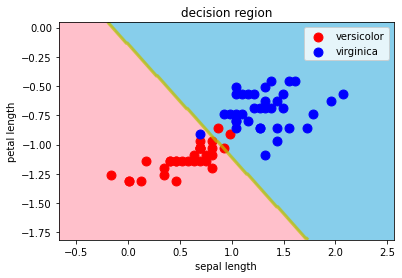

In [129]:
# スクラッチによる決定領域
decision_region(X_train, y_train, model=scratchlog, step=0.01, title='decision region',
                xlabel="sepal length", ylabel="petal length")

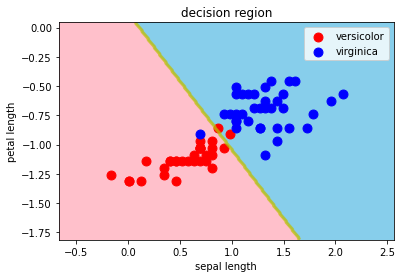

In [131]:
#scilit-learnによる決定領域
decision_region(X_train, y_train, model=sklearn_clf, step=0.01, title='decision region',
                xlabel="sepal length", ylabel="petal length")